In [1]:
import configparser
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir = '/remote/ceph/group/ilc/claws/phase1/RAW/connecticut'
subfolder = 'data_root'
# out = '/Users/mgabriel/Workspace/Plotting/PhD_Thesis/CLAWS/DataTaking/list_of_pvs.csv'
out = '/home/iwsatlas1/mgabriel/workspace/Ploting/PhD_Thesis/CLAWS/DataTaking/list_of_pvs.csv'

In [3]:
entries = ['Properties.EventNr', 'Properties.UnixTime', 'SuperKEKBData.SuperKEKBStatus', 'SuperKEKBData.LERSTatus', 'SuperKEKBData.HERStatus', 'SuperKEKBData.LERInj', 'SuperKEKBData.HERInj', 'SuperKEKBData.LERBg', 'SuperKEKBData.HERBg', 'SuperKEKBData.LERCurrent', 'SuperKEKBData.HERCurrent']

In [4]:
df = pd.DataFrame(columns=entries)
# ini_files = []
# ini_paths = []
for root, dirnames, filenames in os.walk(dir):


    for file in sorted(filenames):
        if file.endswith('.ini') and subfolder in root:
            if '2016-05-' in root or '2016-06-' in root:
                
            #print(os.path.join(root,file))
#                 ini_files.append(os.path.join(root,file))
#                 ini_paths.append(root)
                config = configparser.ConfigParser(strict=False)
                config.optionxform = str
                config.read(os.path.join(root,file))
                
                dict = {}
                for entry in entries:    
                    try:
                        sec = entry.split('.')[0]
                        name = entry.split('.')[1]
                        val = config.get(sec,name)
    #                     try: 
    #                         dict[entry] = float(val)
    #                     except ValueError:
    #                         dict[entry] = val

                        dict[entry] = val
                    except (KeyError, configparser.NoOptionError, configparser.NoSectionError):
                        pass
    #                     print('KEYERROR: ' + entry)
    #                     print(config.items('Properties'))
    #                     print(config.items('SuperKEKBData'))

                df = df.append(dict,ignore_index=True)     

               # print(config.items('Properties'))
                #val = config[entry.split('.')[1]]
                #val = 1
                #print(str(name) + ': ' + str(val))
                #df = df.append({entry: }, ignore_index=True)
            
                
df.to_csv(out)

In [34]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Properties.EventNr
['400407001' '400407002' '400407003' ... '401214299' '401214300'
 '401214301']
Properties.UnixTime
['1463246392.5263095' '1463246400.3447566' '1463246409.7352934' ...
 '1465377305.1248393' '1465377307.6859856' '1465377309.4470863']
SuperKEKBData.SuperKEKBStatus
['Vacuum Scrubbing' 'Tuning' 'Beast Study' 'Abort Study' 'Feedback Tuning'
 'Feedback tuning' 'X-ray monitor tuning' '' 'Collimator Study'
 'Injection background  Study' 'Optics study' 'Optics Correction' 'Limit'
 'Quad BPM' 'Study' 'Beam size measurement']
SuperKEKBData.LERSTatus
['Vacuum Scrubbing' 'Optics measurements' 'Beast Study' 'Feedback tuning'
 '' 'Collimator Study' 'Injection background  Study' 'Optics study'
 'Optics Correction' 'Limit' 'Quad BPM' 'Beast study' 'Size monitor study'
 'Off Momentum Optics Measurement' 'Dithering System Study'
 'Life Time Measurement' 'Beam size measurement' 'Optics Measurement'
 'Blowup Study']
SuperKEKBData.HERStatus
['Vacuum Scrubbing' 'XRM Study & Tuning' 'Injecti

# Read in processed csv file

In [4]:
df = pd.read_csv(out)

In [5]:
df.tail()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent
58564,58564,401214297,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.491263,70.1629
58565,58565,401214298,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.485263,70.1690
58566,58566,401214299,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.485263,70.1588
58567,58567,401214300,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.479163,70.1598
58568,58568,401214301,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.476163,70.1639


In [6]:
df.columns

Index(['Unnamed: 0', 'Properties.EventNr', 'Properties.UnixTime',
       'SuperKEKBData.SuperKEKBStatus', 'SuperKEKBData.LERSTatus',
       'SuperKEKBData.HERStatus', 'SuperKEKBData.LERInj',
       'SuperKEKBData.HERInj', 'SuperKEKBData.LERBg', 'SuperKEKBData.HERBg',
       'SuperKEKBData.LERCurrent', 'SuperKEKBData.HERCurrent'],
      dtype='object')

In [7]:
df['Properties.UnixTime'].describe()

count    5.856900e+04
mean     1.464709e+09
std      1.060083e+06
min      1.463246e+09
25%      1.464069e+09
50%      1.464196e+09
75%      1.465382e+09
max      1.467056e+09
Name: Properties.UnixTime, dtype: float64

In [8]:
pd.to_timedelta('9 h')

Timedelta('0 days 09:00:00')

In [9]:
df['Date'] = pd.to_datetime(df['Properties.UnixTime'],unit='s', origin='unix', utc=True)+pd.to_timedelta('9 h')

In [10]:
df['Date'].describe()

count                                   58569
unique                                  58569
top       2016-05-25 11:14:49.224774837+00:00
freq                                        1
Name: Date, dtype: object

In [11]:
df.tail()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent,Date
58564,58564,401214297,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.491263,70.1629,2016-06-08 18:15:00.961600780+00:00
58565,58565,401214298,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.485263,70.1690,2016-06-08 18:15:03.445743084+00:00
58566,58566,401214299,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.485263,70.1588,2016-06-08 18:15:05.124839306+00:00
58567,58567,401214300,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.479163,70.1598,2016-06-08 18:15:07.685985565+00:00
58568,58568,401214301,1.465377e+09,NaN,Optics Measurement,RF Gun Study,0.0,12.5,0,1,31.476163,70.1639,2016-06-08 18:15:09.447086573+00:00


In [12]:
df = df.sort_values(by=['Date'])
df.tail()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent,Date
49172,49172,401266228,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.013787,-0.024287,2016-06-28 04:30:36.474936485+00:00
49173,49173,401266229,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.016787,-0.025287,2016-06-28 04:30:45.059427261+00:00
49174,49174,401266230,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,-0.002413,-0.024287,2016-06-28 04:30:51.786811829+00:00
49175,49175,401266231,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,-0.008413,-0.026287,2016-06-28 04:30:58.512197017+00:00
49176,49176,401266232,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.007688,-0.022187,2016-06-28 04:31:06.702665329+00:00


In [13]:
# df = df.set_index('Date')
# # df.tail()

In [14]:
pd.to_datetime(1.464188e+09,unit='s', origin='unix', utc=True).tz_convert('Asia/Tokyo')

Timestamp('2016-05-25 23:53:20+0900', tz='Asia/Tokyo')

In [15]:
pd.to_datetime(1.464188e+09,unit='s', origin='unix', utc=True)+pd.to_timedelta('9 h')

Timestamp('2016-05-25 23:53:20+0000', tz='UTC')

In [16]:
#df.Date = df.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')
# df.Date = df.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')
# df.tail()

In [17]:
#df = df.set_index('Date')

In [18]:
# df[(df['Date']>='2016-05-25')&(df['Date']<='2016-05-26')].head()

In [22]:
df[df['SuperKEKBData.HERStatus'] =='Vacuum Scrubbing'].tail()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent,Date
27798,27798,401196111,1.464514e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,12.5,0.0,0,0,796.634188,588.35385,2016-05-29 18:22:21.571004391+00:00
27799,27799,401196112,1.464514e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,12.5,0.0,0,0,795.391788,588.18515,2016-05-29 18:22:30.170495987+00:00
27800,27800,401196113,1.464514e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,12.5,0.0,0,0,794.270588,588.05525,2016-05-29 18:22:36.756872654+00:00
27801,27801,401196114,1.464514e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,12.5,0.0,0,0,793.337288,587.93255,2016-05-29 18:22:43.326248407+00:00
27802,27802,401196115,1.464514e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,12.5,0.0,0,0,791.917188,587.74645,2016-05-29 18:22:51.780732155+00:00


In [30]:
# df = df.set_index('Date')
# #ind_df=df.set_index(['A', 'B'])
# df.tail()

In [31]:
df.head()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent,Date
33,33,400406001,1.463246e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,0.0,25.0,0,1,NaN,NaN,2016-05-15 02:17:06.177794933+00:00
34,34,400406002,1.463246e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,0.0,25.0,0,1,NaN,NaN,2016-05-15 02:17:15.035301447+00:00
35,35,400406003,1.463246e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,0.0,25.0,0,1,NaN,NaN,2016-05-15 02:17:21.766686440+00:00
36,36,400406004,1.463246e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,0.0,25.0,0,1,NaN,NaN,2016-05-15 02:17:29.452126026+00:00
37,37,400406005,1.463246e+09,Vacuum Scrubbing,Vacuum Scrubbing,Vacuum Scrubbing,0.0,25.0,0,1,NaN,NaN,2016-05-15 02:17:38.485642910+00:00


Min: 
2016-05-15 02:17:06.177794933+00:00
Max: 
2016-06-28 04:31:06.702665329+00:00


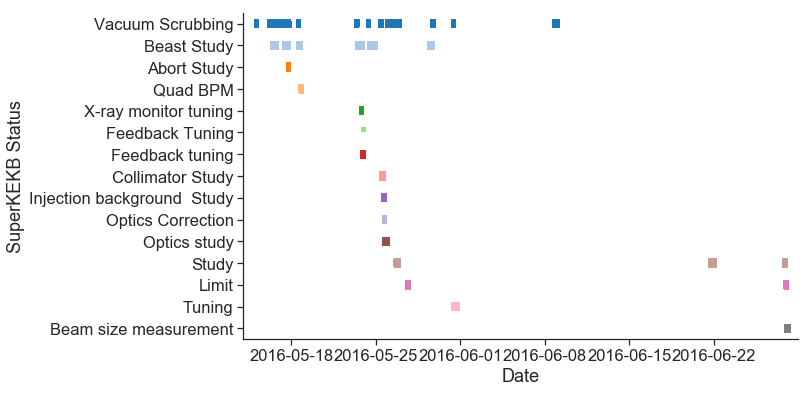

In [117]:
# df_tmp = df[df['Date'] >= '2016-06-21']
#df_tmp = df[df['SuperKEKBData.SuperKEKBStatus'] == 'Beam size measurement']
#df_tmp = df[df['SuperKEKBData.SuperKEKBStatus'] =='Injection background  Study']
df_tmp = df
print("Min: ")
print(df_tmp['Date'].min())
print("Max: ")
print(df_tmp['Date'].max())
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette = sns.color_palette('tab20')
#plt.figure(figsize=(5.8055602,2.9))
sns.set(font_scale=1.4, style='ticks')
#sns.despine(left=True)
#fg = sns.stripplot(x='Date', y='SuperKEKBData.SuperKEKBStatus', data=df_tmp, orient='h')
fg = sns.catplot(x='Date', y='SuperKEKBData.SuperKEKBStatus', height =5.8055602, aspect=2, data=df_tmp,palette=palette, marker=',')
fg.set_ylabels('SuperKEKB Status')
fg.set(xlim=('2016-05-14','2016-06-28 23:59'))
#fg.set(xlim=(df_tmp['Date'].min(),df_tmp['Date'].max()))
fg.savefig('superkekbstatus_over_time.pdf', bbox_inches='tight')

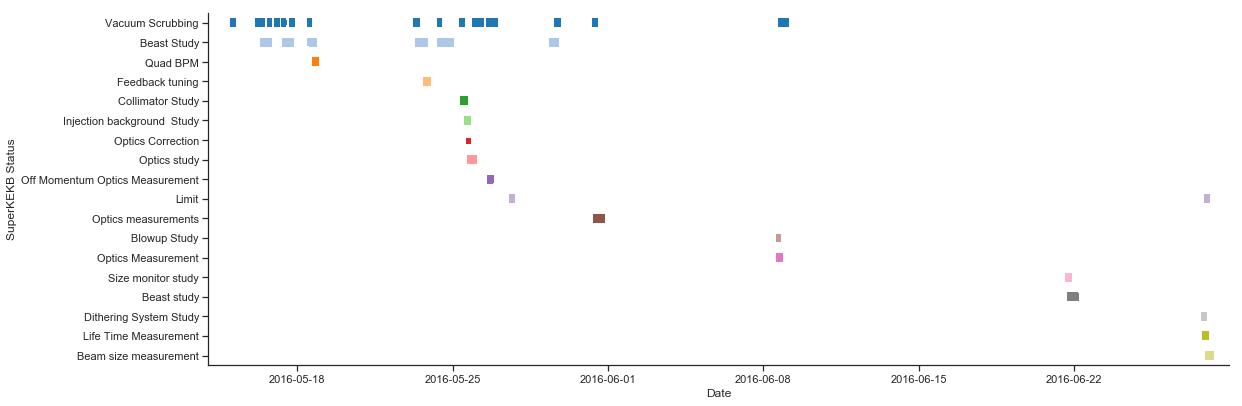

In [109]:
# plt.figure(figsize=(16,4))
# sns.catplot(x='Date', y='SuperKEKBData.LERSTatus', data=df, aspect=3, jitter=1.)

palette = sns.color_palette('tab20')
#plt.figure(figsize=(5.8055602,2.9))
sns.set(font_scale=1, style='ticks')
#sns.despine(left=True)
#fg = sns.stripplot(x='Date', y='SuperKEKBData.SuperKEKBStatus', data=df_tmp, orient='h')
fg = sns.catplot(x='Date', y='SuperKEKBData.LERSTatus', height =5.8055602, aspect=3, data=df_tmp,palette=palette, marker=',')
fg.set_ylabels('SuperKEKB Status')
fg.set(xlim=('2016-05-14','2016-06-28 23:59'))
#fg.set(xlim=(df_tmp['Date'].min(),df_tmp['Date'].max()))
fg.savefig('superkekb_lerstatus_over_time.pdf', bbox_inches='tight')

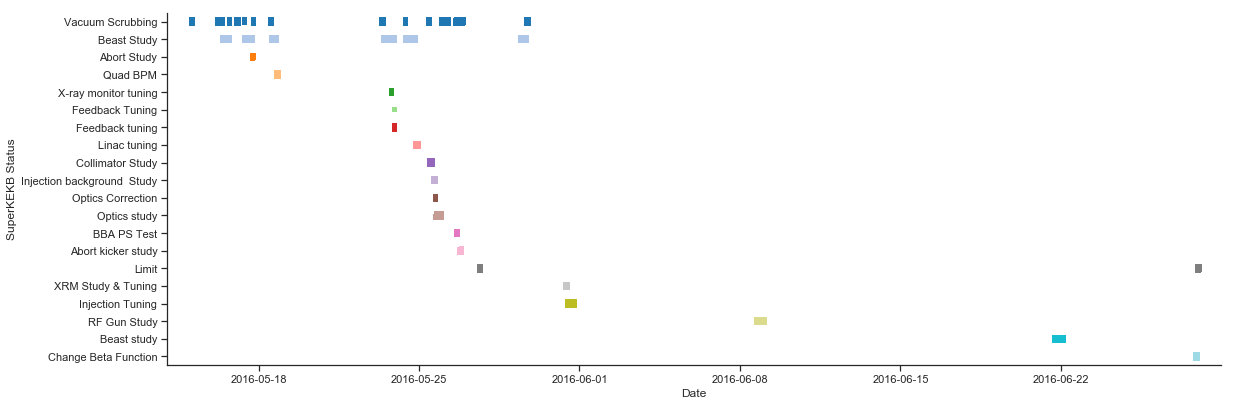

In [110]:
# plt.figure(figsize=(16,4))
# sns.catplot(x='Date', y='SuperKEKBData.HERStatus', data=df, aspect=3)

palette = sns.color_palette('tab20')
#plt.figure(figsize=(5.8055602,2.9))
sns.set(font_scale=1, style='ticks')
#sns.despine(left=True)
#fg = sns.stripplot(x='Date', y='SuperKEKBData.SuperKEKBStatus', data=df_tmp, orient='h')
fg = sns.catplot(x='Date', y='SuperKEKBData.HERStatus', height =5.8055602, aspect=3, data=df_tmp,palette=palette, marker=',')
fg.set_ylabels('SuperKEKB Status')
fg.set(xlim=('2016-05-14','2016-06-28 23:59'))
#fg.set(xlim=(df_tmp['Date'].min(),df_tmp['Date'].max()))
fg.savefig('superkekb_herstatus_over_time.pdf', bbox_inches='tight')

In [8]:
print("Min timestamp:")
print(pd.to_datetime(df['Properties.UnixTime'].min(),unit='s'))
print("Max timestamp:")
print(pd.to_datetime(df['Properties.UnixTime'].max(),unit='s'))

Min timestamp:
2016-05-14 17:17:06.177794933
Max timestamp:
2016-06-27 19:31:06.702665329


In [141]:
df.tail()

,Unnamed: 0,Properties.EventNr,Properties.UnixTime,SuperKEKBData.SuperKEKBStatus,SuperKEKBData.LERSTatus,SuperKEKBData.HERStatus,SuperKEKBData.LERInj,SuperKEKBData.HERInj,SuperKEKBData.LERBg,SuperKEKBData.HERBg,SuperKEKBData.LERCurrent,SuperKEKBData.HERCurrent,Date
49172,49172,401266228,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.013787,-0.024287,2016-06-28 04:30:36.474936485+00:00
49173,49173,401266229,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.016787,-0.025287,2016-06-28 04:30:45.059427261+00:00
49174,49174,401266230,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,-0.002413,-0.024287,2016-06-28 04:30:51.786811829+00:00
49175,49175,401266231,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,-0.008413,-0.026287,2016-06-28 04:30:58.512197017+00:00
49176,49176,401266232,1.467056e+09,Beam size measurement,Beam size measurement,NaN,1.0,0.0,0,0,0.007688,-0.022187,2016-06-28 04:31:06.702665329+00:00


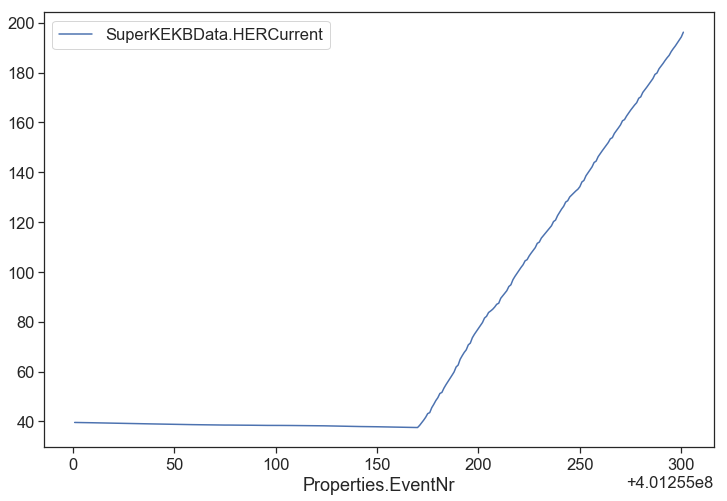

In [160]:
df_tmp = df[(df['Date']>='2016-06-27')&(df['Properties.EventNr']>=401255000)&(df['Properties.EventNr']<=401256000)]
#df_tmp = df[df['Date']>='2016-06-27']
df_tmp.plot(x='Properties.EventNr',y='SuperKEKBData.HERCurrent',figsize=(12,8))

In [31]:
lim = 1
df[(df['SuperKEKBData.HERCurrent']<lim)&(df['SuperKEKBData.LERCurrent']<lim)&(df['SuperKEKBData.LERInj']==0)&(df['SuperKEKBData.HERInj']==0)].shape

(124308, 12)

In [32]:
df[(df['SuperKEKBData.HERCurrent']<lim)&(df['SuperKEKBData.LERCurrent']<lim)].shape

(126686, 12)

In [127]:
df[(df['SuperKEKBData.SuperKEKBStatus'] =='Vacuum Scrubbing')&(df['SuperKEKBData.LERSTatus'] =='Vacuum Scrubbing')&(df['SuperKEKBData.HERStatus'] =='Vacuum Scrubbing')].count()

Unnamed: 0                       10669
Properties.EventNr               10669
Properties.UnixTime              10669
SuperKEKBData.SuperKEKBStatus    10669
SuperKEKBData.LERSTatus          10669
SuperKEKBData.HERStatus          10669
SuperKEKBData.LERInj             10669
SuperKEKBData.HERInj             10669
SuperKEKBData.LERBg              10669
SuperKEKBData.HERBg              10669
SuperKEKBData.LERCurrent         10581
SuperKEKBData.HERCurrent         10581
Date                             10669
dtype: int64